# Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
import keras 
from tensorflow.keras import layers


# Load mnist data

In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# to get the shape of the data 
print("x_train shape:",x_train.shape)
print("x_test shape", x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape (10000, 28, 28)


# visualizing our data

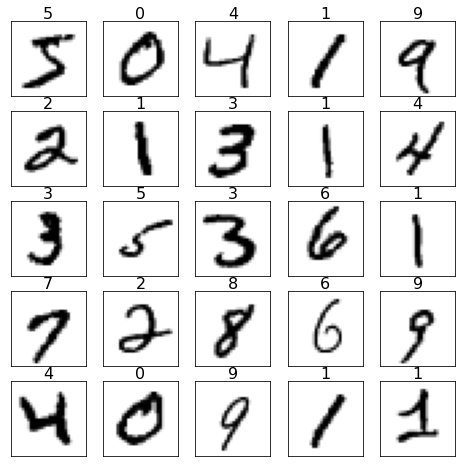

In [3]:
plt.figure(figsize = (8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
  plt.imshow(x_train[i], cmap = plt.cm.binary )
  plt.xticks([])
  plt.yticks([])

plt.show()

# Spliting test data for validation and testing

* train 90%
* test 10%

In [4]:
val_images = x_test[:9000]
test_images = x_test[9000:]

# Normalizing and reshaping

In [5]:
val_images = val_images.astype('float32') / 255.0
val_images = np.reshape(val_images,(val_images.shape[0],28,28,1))

test_images = test_images.astype('float32') / 255.0
test_images = np.reshape(test_images,(test_images.shape[0],28,28,1))

train_images = x_train.astype("float32") / 255.0
train_images = np.reshape(train_images, (train_images.shape[0],28,28,1))

# Adding noise

In [6]:
factor = 0.17
train_noisy_images = train_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = train_images.shape)
val_noisy_images = val_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = val_images.shape)
test_noisy_images = test_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = test_images.shape)

# here maximum pixel value for our images may exceed 1 so we have to clip the images
train_noisy_images = np.clip(train_noisy_images,0.,1.)
val_noisy_images = np.clip(val_noisy_images,0.,1.)
test_noisy_images = np.clip(test_noisy_images,0.,1.)

# Visualizing images after adding noise

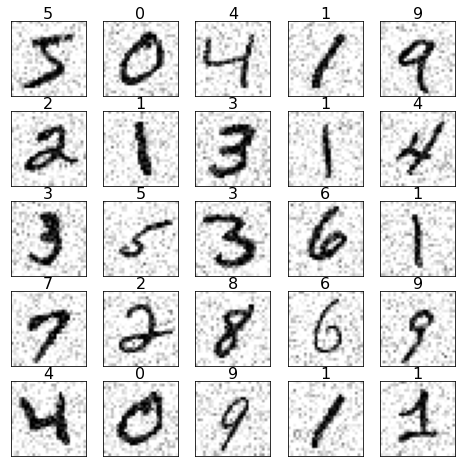

In [7]:
plt.figure(figsize = (8,8))

for i in range(25):      
      plt.subplot(5,5,i+1)
      plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
      plt.imshow(train_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary )
      plt.xticks([])
      plt.yticks([])

plt.show()

# Defining our autoencoder model

In [8]:
model = tf.keras.models.Sequential()
# encoder network
# First convolutional layer
model.add(layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same', input_shape=(28, 28, 1)))
# First max pooling layer
model.add(layers.MaxPool2D(pool_size=2, strides=2))
# Second convolutional layer
model.add(layers.Conv2D(filters=8, kernel_size=3, activation="relu", padding='same'))
# Second max pooling layer
model.add(layers.MaxPool2D(pool_size=2, strides=2))

# decoder network
# First upsampling layer
model.add(layers.UpSampling2D(size=2))
# First ConvTranspose layer
model.add(layers.Conv2DTranspose(filters=16, kernel_size=3, activation="relu", padding='same'))
# Second upsampling layer
model.add(layers.UpSampling2D(size=2))
# Second ConvTranspose layer
model.add(layers.Conv2DTranspose(filters=1, kernel_size=3, activation="relu", padding='same'))
model.add(layers.Activation('sigmoid'))

# to get the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                        

# Compile model

In [9]:
OPTIMIZER =  tf.keras.optimizers.Adam(learning_rate = 3e-4)
LOSS = 'mean_squared_error'
model.compile(optimizer =OPTIMIZER, loss = LOSS, metrics = ['accuracy'])

# Fitting the model

In [10]:
EPOCHS = 10
BATCH_SIZE = 256
VALIDATION = (val_noisy_images, val_images)
history = model.fit(train_noisy_images, train_images,batch_size = BATCH_SIZE,epochs = EPOCHS, validation_data = VALIDATION)

Epoch 1/10
235/235 [==============================] - 6s 9ms/step - loss: 0.2228 - accuracy: 0.7886 - val_loss: 0.2166 - val_accuracy: 0.8077
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2155 - accuracy: 0.8107 - val_loss: 0.2139 - val_accuracy: 0.8124
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2138 - accuracy: 0.8130 - val_loss: 0.2129 - val_accuracy: 0.8133
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2130 - accuracy: 0.8138 - val_loss: 0.2123 - val_accuracy: 0.8137
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2125 - accuracy: 0.8142 - val_loss: 0.2120 - val_accuracy: 0.8139
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2122 - accuracy: 0.8143 - val_loss: 0.2117 - val_accuracy: 0.8141
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2120 - accuracy: 0.8145 - val_loss: 0.2115 - val_accuracy: 0.8142
Epoch 

# Model evaluation

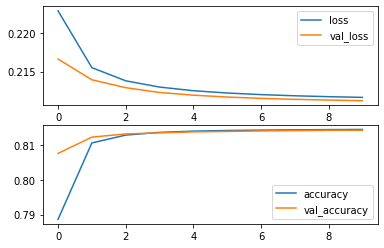

In [11]:
plt.subplot(2,1,1)
plt.plot( history.history['loss'], label = 'loss')
plt.plot( history.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')
plt.subplot(2,1,2)
plt.plot( history.history['accuracy'], label = 'accuracy')
plt.plot( history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.show()

# Visualizing our predicted images along with real and noised images

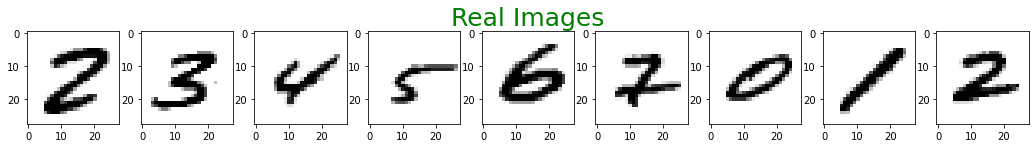

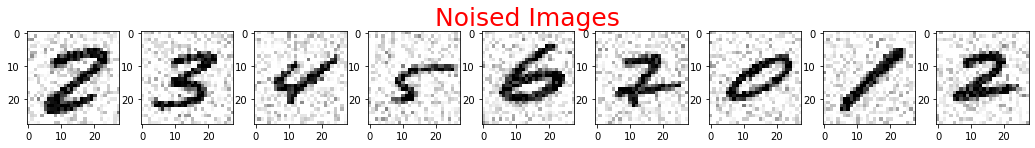

1/1 [==============================] - 0s 15ms/step


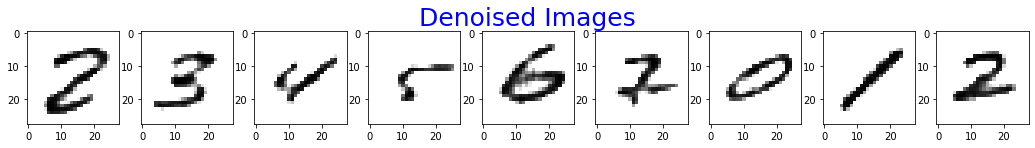

In [12]:
plt.figure(figsize = (18,18))
for i in range(10,19):
    plt.subplot(9,9,i)
    if(i == 14):
        plt.title('Real Images', fontsize = 25, color = 'Green') 
    plt.imshow(test_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):
    if(i == 15):
        plt.title('Noised Images', fontsize = 25, color = 'red') 
    plt.subplot(9,9,i)
    plt.imshow(test_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):  
    if(i == 15):
        plt.title('Denoised Images', fontsize = 25, color = 'Blue') 
    
    plt.subplot(9,9,i)
    plt.imshow(model.predict(test_noisy_images[i].reshape(1,28,28,1)).reshape(1,28,28)[0], cmap = plt.cm.binary) 
plt.show()